In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load the retail sales dataset
#read in all data
retail_data = pd.read_csv("/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv")



/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv


# **Exploratory Data Analysis (EDA) on Retail Sales Data**

Exploratory Data Analysis (EDA) is a critical step in the data analysis process where you examine and explore your dataset to understand its characteristics, discover patterns, spot anomalies,trends,and insights that can help the retail business make informed decisions.

**1. Data Loading and Cleaning**
Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).

In [4]:
# set seed for reproducibility
np.random.seed(0)

# are there missing values
retail_data.head()

# Calculate basic statistics (mean, median, mode, standard deviation).

#check info about dataset
retail_data.info()

# cut "Total amount" column for my data
data = retail_data.iloc[:, 8]
print(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
0       150
1      1000
2        30
3       500
4       100
       ... 
995      50
996      90
997     100
998     150
999     120
Name: Total Amount, Length: 1000, dtype: int64


**2. Descriptive Statistics**
We are going to Calculate basic statistics (mean, median, mode, standard deviation).

In [5]:
#get mean
mean = data.mean()
print(mean)

# get median
median = data.median()
print(median)

# get mode
mode = data.mode()
print(mode) 

# stadard deviation 
std =data.std()
print (std)

456.0
135.0
0    50
Name: Total Amount, dtype: int64
559.997631555123


**3. Time series**

Time series analysis is a statistical technique used to analyze and interpret data points collected or observed over a period of time. It involves identifying patterns, trends, and relationships within the data to make predictions or derive insights about future behavior.

Time Series Data: Time series data consists of observations or measurements collected at equally spaced time intervals. We will e observing our monthly retail sales 

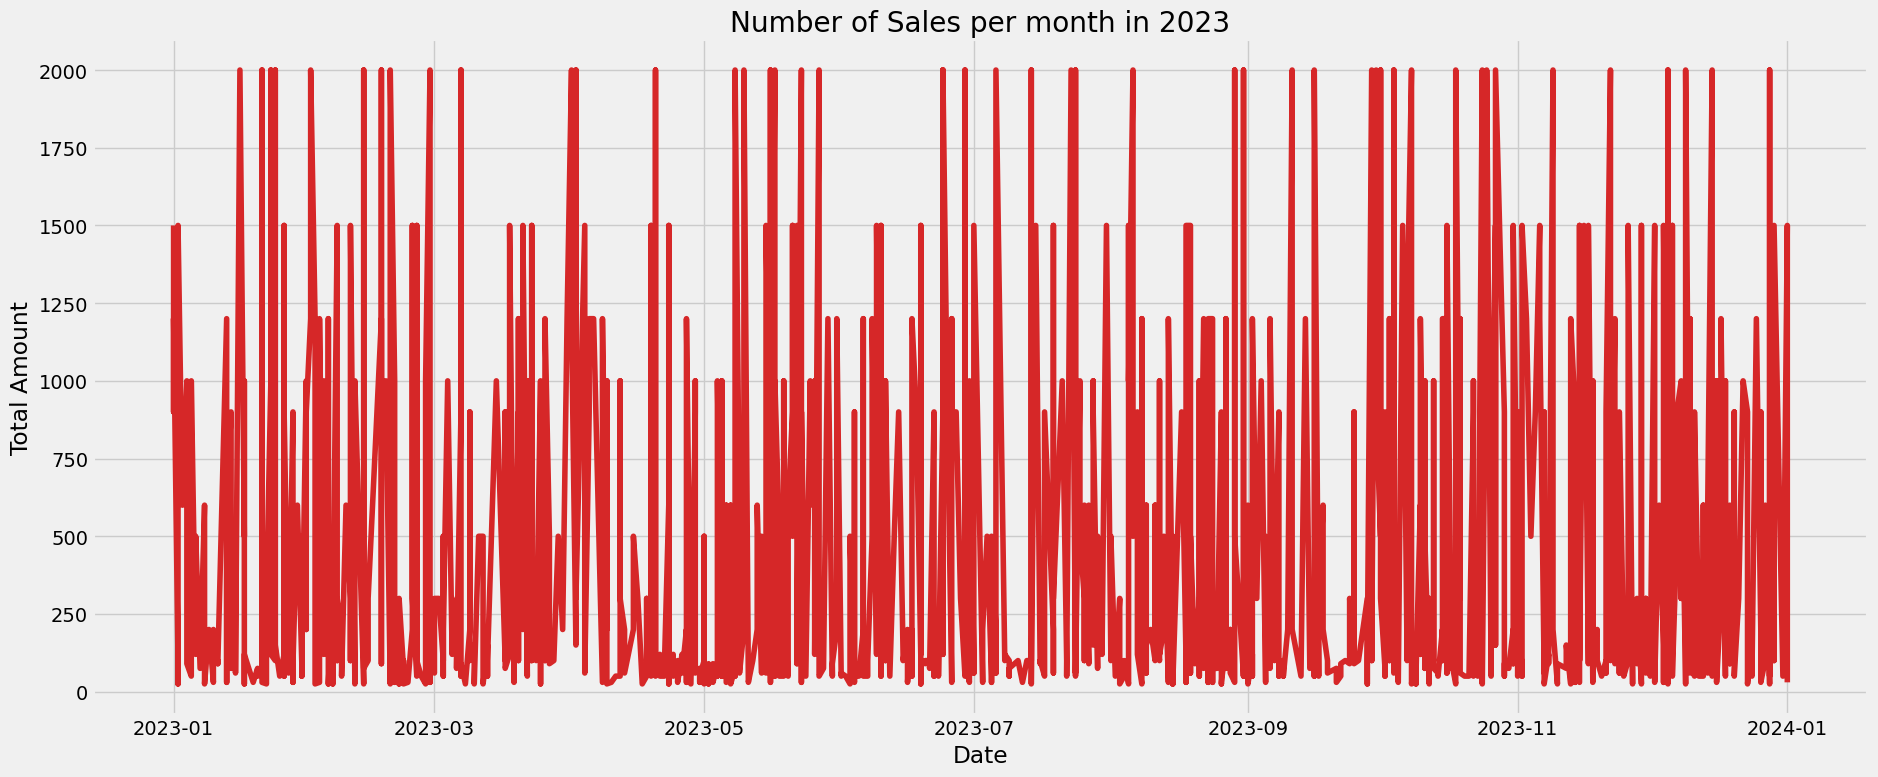

In [6]:
df.head()
df.sort_values('Date', inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df_sorted_by_amount = df.sort_values(by='Total Amount', ascending=False)


def plot_df(df, x, y, title="", xlabel='Date', ylabel='Total Amount', dpi=100):
    plt.figure(figsize=(19, 8))
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.tight_layout()

plot_df(df, x=df['Date'], y=df['Total Amount'], title='Number of Sales per month in 2023')

The results shows the number of sales generated every month in the year 2023.

**3. Customer and Product Analysis(Visualization)**


In [20]:
retail_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


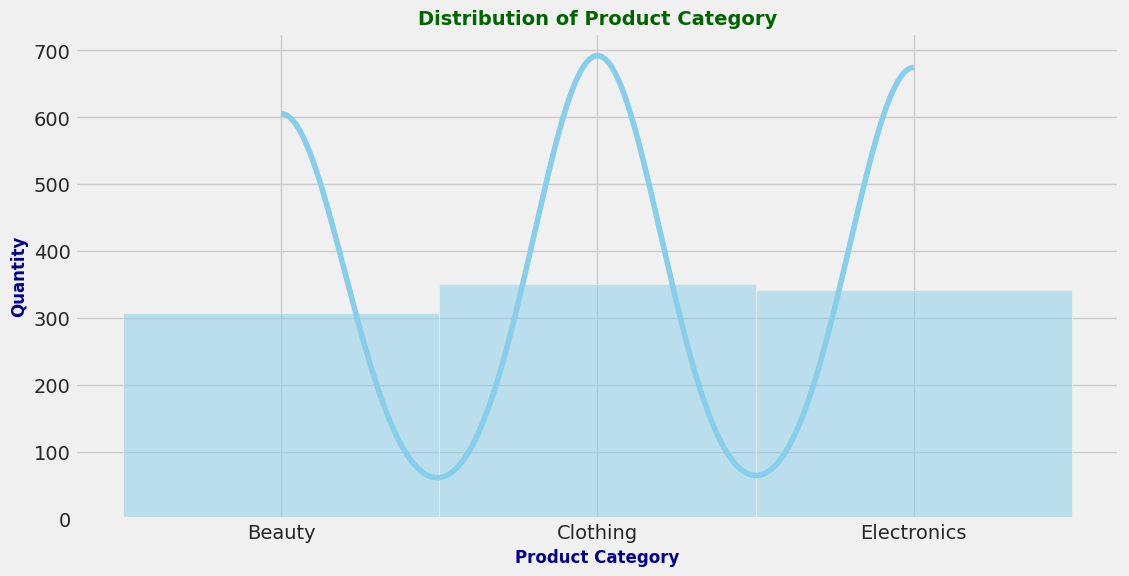

In [19]:
#customers and products

# Distribution of products per category
plt.figure(figsize=(12, 6))
sns.histplot(retail_data['Product Category'], kde=True, color='skyblue')
plt.title('Distribution of Product Category', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Product Category', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Quantity', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.savefig('Distribution of Product Category.png')
plt.show()
#Clothing is the lead product category according to the didtribution, followed by electronics and beauty.



Clothing is the lead product category according to the didtribution, followed by electronics and beauty.

Lets check the most common age

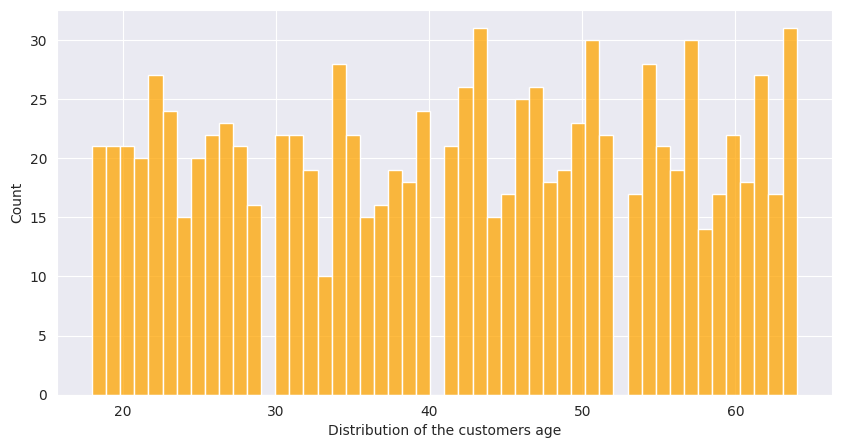

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=retail_data, x='Age', bins=50, color='orange')
ax.set_xlabel('Distribution of the customers age')
plt.show()

The results shows that the most common age in the sales data is 43 and 64.

**4. Visualization**

 Present insights through bar charts, line plots, and heatmaps.

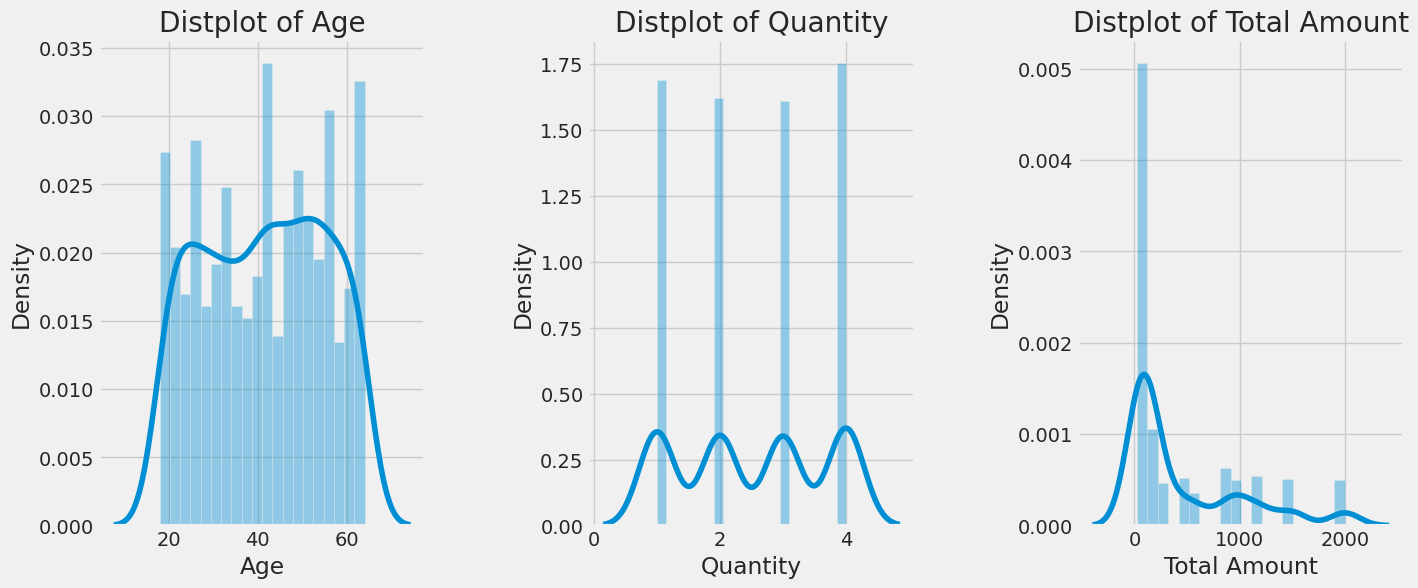

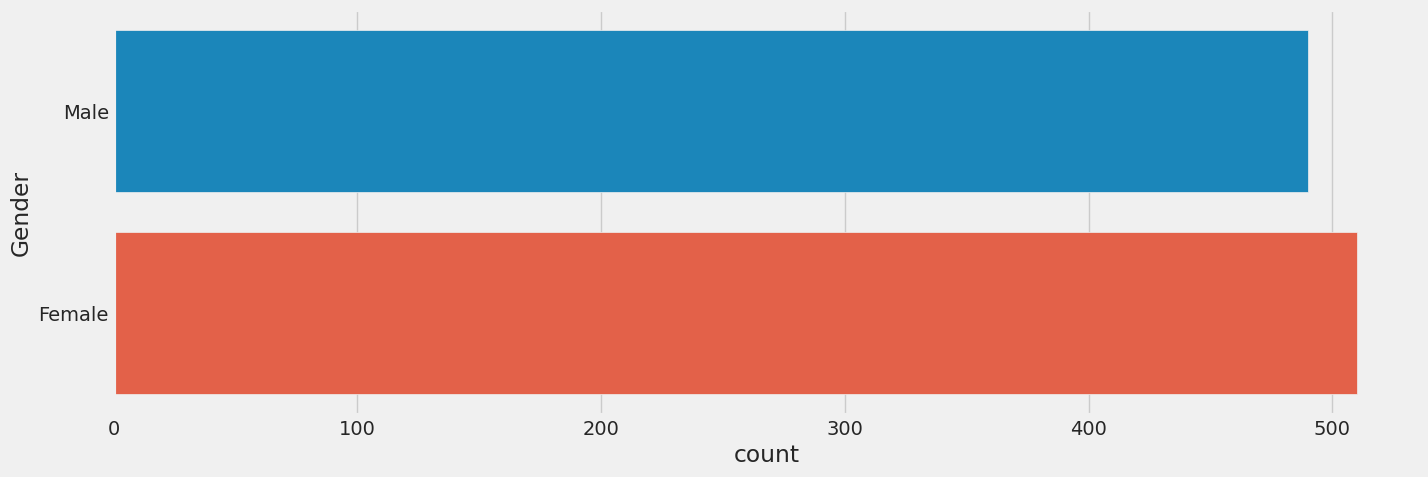

In [18]:

#Data Visualization
plt.style.use('fivethirtyeight')

#Histograms
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Quantity' , 'Total Amount']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(retail_data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

#Count plot of gender
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = retail_data)
plt.show()

The Result shows that the retail sales data consist of more female consumers than males.

**Data Exploration Analysis:** entails familiarizing yourself with the data. You have to use Pandas library to explore data. Pandas is the primary tool data scientists use for exploring and manipulating data

* **Understand the Data**: 
Examine the structure of the dataset, including the number of rows and columns, data types, and column names.Check for 
* **Missing Values**: 
Identify any missing values in the dataset and decide on appropriate strategies for handling them (e.g., imputation or removal).

* **Explore Summary Statistics**: 
Calculate summary statistics (mean, median, min, max) for numerical variables and understand their distribution. This helps in identifying outliers and understanding the central tendency of the data.

**Time Series Analysis**:

* **Time Trends**: 
Analyze sales trends over time to identify seasonality, trends, and any irregular patterns.
* **Seasonal Analysis**: 
Explore seasonal variations in sales, such as spikes during holidays or specific seasons.
* **Monthly/Weekly Trends**: 
Investigate whether sales exhibit monthly or weekly patterns, such as higher sales on weekends or specific days of the week.
* **Year-over-Year Growth**: 
Calculate year-over-year growth rates to assess the overall growth trajectory of the business.

**Product Analysis**:

* **Top Selling Products**: 
Identify the top-selling products by sales volume or revenue and analyze their performance over time.
* **Product Categories**: 
Explore sales trends across different product categories to identify the most profitable categories.

* **Product Price Analysis**:
Analyze the impact of product prices on sales volume and revenue.

**Customer Analysis**:

* **Customer Segmentation**: 
Segment customers based on their purchasing behavior (e.g., frequency of purchase, average transaction value) to identify valuable customer segments.